In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.stats import gaussian_kde
import scipy.ndimage as ndimage
from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn

# Testing part and organization of the data 

In [2]:
fblue = fits.open('master_flat_median_20220316_SDSSg_65_94.fits')
#fred = fits.open('master_flat_median_20220316_SDSSr_110_124.fits')
#fred = fits.open('master_flat_median_20211104_FELH0600_61_115.fits')
fred = fits.open('master_flat_median_20211007_FELH0600_63_115.fits')
#fratio = fits.open('ratio_master_flat_median_SDSSr_SDSSg.fits')

In [3]:
#fred[0].header

In [4]:
shape0 = fred[1].data.shape

In [5]:
#fred[1].header

In [6]:
for i in range(1,len(fred)):
    print(i, fred[i].header['EXTNAME'])

1 Segment00
2 Segment01
3 Segment02
4 Segment03
5 Segment04
6 Segment05
7 Segment06
8 Segment07
9 Segment17
10 Segment16
11 Segment15
12 Segment14
13 Segment13
14 Segment12
15 Segment11
16 Segment10


In [7]:
num_segments = len(fred)-1

In [8]:
hprescan = 3
hoverscan = 64
voverscan = 48

# Glue all the registers in a single image (removing overscan) 

In [38]:
#data0red = fred[seg].data[:shape0[0]-voverscan,hprescan:shape0[1]-hoverscan]
#data0blue = fblue[seg].data[:shape0[0]-voverscan,hprescan:shape0[1]-hoverscan]
#data0ratio = data0red/data0blue

In [20]:
#seg = 6
for seg in range(1,9):
    print(seg,fred[seg].header['EXTNAME'])
    data_ = fred[seg].data[:shape0[0]-voverscan,hprescan:shape0[1]-hoverscan]
    data_ = np.flip(data_,axis=1)
    if seg==1:
        dred0 = data_
    else:
        dred0 = np.concatenate((dred0,data_),axis=1)
for seg in range(9,num_segments+1):
    seg = num_segments+9-seg
    print(seg,fred[seg].header['EXTNAME'])
    data_ = fred[seg].data[:shape0[0]-voverscan,hprescan:shape0[1]-hoverscan]
    data_ = np.flip(data_,axis=0)
    data_ = np.flip(data_,axis=1)
    if seg==16:
        dred1 = data_
    else:
        dred1 = np.concatenate((dred1,data_),axis=1)
data0red = np.concatenate((dred0,dred1),axis=0)
        

1 Segment00
2 Segment01
3 Segment02
4 Segment03
5 Segment04
6 Segment05
7 Segment06
8 Segment07
16 Segment10
15 Segment11
14 Segment12
13 Segment13
12 Segment14
11 Segment15
10 Segment16
9 Segment17


In [ ]:
data0red.shape

(4000, 4072)

(array([1.568000e+03, 1.699000e+03, 1.725000e+03, 1.840000e+03,
        1.972000e+03, 1.873000e+03, 2.043000e+03, 1.982000e+03,
        1.888000e+03, 1.961000e+03, 2.032000e+03, 2.183000e+03,
        2.266000e+03, 2.361000e+03, 2.539000e+03, 2.639000e+03,
        2.900000e+03, 3.039000e+03, 3.146000e+03, 3.195000e+03,
        3.410000e+03, 3.548000e+03, 3.675000e+03, 3.756000e+03,
        4.024000e+03, 4.115000e+03, 4.557000e+03, 4.632000e+03,
        5.098000e+03, 5.447000e+03, 6.291000e+03, 7.017000e+03,
        8.194000e+03, 9.865000e+03, 1.267400e+04, 1.712600e+04,
        2.398900e+04, 3.574800e+04, 5.348300e+04, 8.166900e+04,
        1.229040e+05, 1.816480e+05, 2.618620e+05, 3.639940e+05,
        4.902560e+05, 6.334840e+05, 7.871350e+05, 9.381470e+05,
        1.071802e+06, 1.164143e+06, 1.253762e+06, 1.256007e+06,
        1.220599e+06, 1.137505e+06, 1.026315e+06, 8.882130e+05,
        7.409460e+05, 5.977170e+05, 4.658920e+05, 3.546480e+05,
        2.626380e+05, 1.892430e+05, 1.34

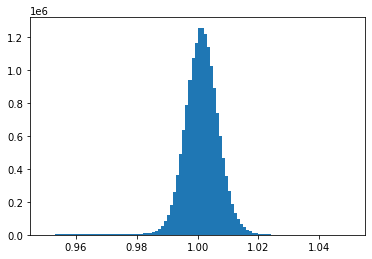

In [35]:
plt.hist(data0red.ravel(),bins=100,range=(0.95,1.05))

/tmp/ipykernel_7193/1968337629.py:3: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.imshow(data0red,cmap="gray",vmin=0.95,vmax=1.05,norm=LogNorm())


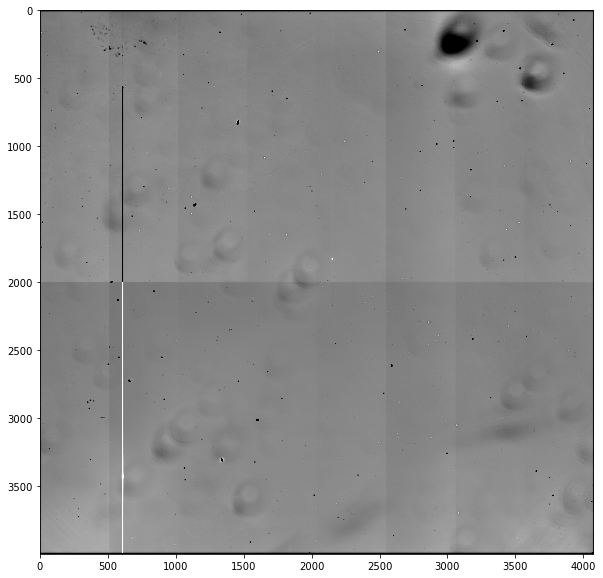

In [36]:
fig = plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
ax.imshow(data0red,cmap="gray",vmin=0.95,vmax=1.05,norm=LogNorm())

In [24]:
for seg in range(1,9):
    print(seg,fblue[seg].header['EXTNAME'])
    data_ = fblue[seg].data[:shape0[0]-voverscan,hprescan:shape0[1]-hoverscan]
    data_ = np.flip(data_,axis=1)
    if seg==1:
        dblue0 = data_
    else:
        dblue0 = np.concatenate((dblue0,data_),axis=1)
for seg in range(9,num_segments+1):
    seg = num_segments+9-seg
    print(seg,fblue[seg].header['EXTNAME'])
    data_ = fblue[seg].data[:shape0[0]-voverscan,hprescan:shape0[1]-hoverscan]
    data_ = np.flip(data_,axis=0)
    data_ = np.flip(data_,axis=1)
    if seg==16:
        dblue1 = data_
    else:
        dblue1 = np.concatenate((dblue1,data_),axis=1)
data0blue = np.concatenate((dblue0,dblue1),axis=0)

1 Segment00
2 Segment01
3 Segment02
4 Segment03
5 Segment04
6 Segment05
7 Segment06
8 Segment07
16 Segment10
15 Segment11
14 Segment12
13 Segment13
12 Segment14
11 Segment15
10 Segment16
9 Segment17


In [30]:
data0blue.shape

(4000, 4072)

(array([3.270000e+02, 2.390000e+02, 2.280000e+02, 3.480000e+02,
        4.370000e+02, 4.470000e+02, 6.030000e+02, 7.770000e+02,
        4.930000e+02, 6.000000e+02, 6.660000e+02, 1.022000e+03,
        1.061000e+03, 9.500000e+02, 1.211000e+03, 1.582000e+03,
        1.568000e+03, 1.626000e+03, 1.957000e+03, 2.597000e+03,
        3.448000e+03, 4.450000e+03, 5.079000e+03, 5.651000e+03,
        6.876000e+03, 7.777000e+03, 8.749000e+03, 9.703000e+03,
        1.081800e+04, 1.163600e+04, 1.218900e+04, 1.332600e+04,
        1.466900e+04, 1.575400e+04, 1.611100e+04, 1.701900e+04,
        1.914000e+04, 2.137600e+04, 2.309200e+04, 2.558400e+04,
        2.863800e+04, 3.178500e+04, 3.520600e+04, 3.976600e+04,
        4.407500e+04, 4.768500e+04, 5.090800e+04, 5.526900e+04,
        5.953000e+04, 6.566900e+04, 7.167400e+04, 7.781900e+04,
        8.414500e+04, 9.039500e+04, 9.821900e+04, 1.055770e+05,
        1.137460e+05, 1.193120e+05, 1.234600e+05, 1.276770e+05,
        1.332490e+05, 1.399510e+05, 1.48

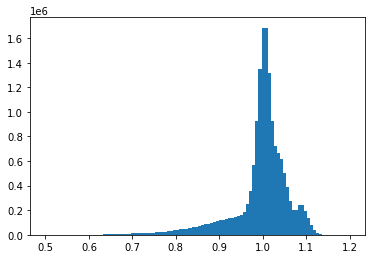

In [31]:
plt.hist(data0blue.ravel(),bins=100,range=(0.5,1.2))

/tmp/ipykernel_7193/1253256174.py:3: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.imshow(data0blue,cmap="gray",vmin=0.55,vmax=1.15,norm=LogNorm())


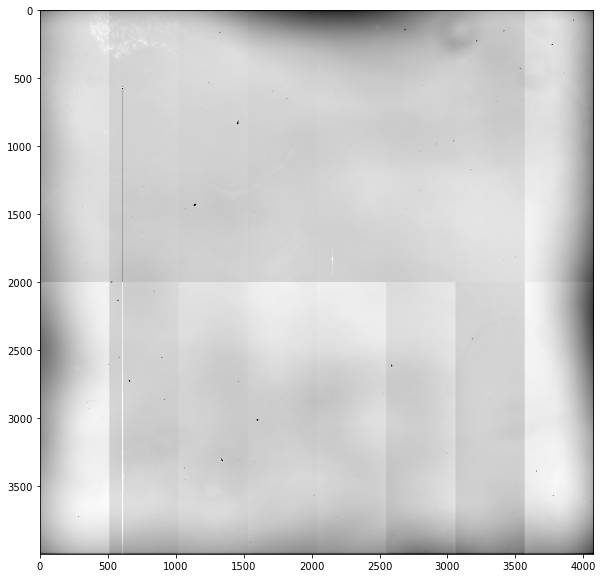

In [33]:
fig = plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
ax.imshow(data0blue,cmap="gray",vmin=0.55,vmax=1.15,norm=LogNorm())

In [39]:
data0ratio = data0red/data0blue

(array([7.300000e+01, 7.200000e+01, 7.200000e+01, 9.500000e+01,
        1.020000e+02, 9.300000e+01, 2.110000e+02, 2.550000e+02,
        2.460000e+02, 2.530000e+02, 2.020000e+02, 2.080000e+02,
        2.580000e+02, 3.320000e+02, 4.320000e+02, 4.670000e+02,
        5.320000e+02, 6.030000e+02, 6.070000e+02, 6.530000e+02,
        8.640000e+02, 2.339000e+03, 8.558000e+03, 1.703400e+04,
        3.890200e+04, 6.372500e+04, 1.062860e+05, 1.293040e+05,
        1.699590e+05, 2.024560e+05, 1.803960e+05, 1.315650e+05,
        1.143830e+05, 1.234230e+05, 1.380530e+05, 1.689060e+05,
        2.310850e+05, 2.871870e+05, 3.099800e+05, 3.593060e+05,
        3.679750e+05, 3.970850e+05, 4.202380e+05, 4.483340e+05,
        4.934260e+05, 5.818890e+05, 7.636560e+05, 9.071560e+05,
        9.637700e+05, 1.012368e+06, 9.483890e+05, 8.140390e+05,
        7.237360e+05, 5.511890e+05, 4.167760e+05, 3.068550e+05,
        2.324690e+05, 1.894890e+05, 1.645710e+05, 1.253480e+05,
        1.093740e+05, 9.429700e+04, 8.47

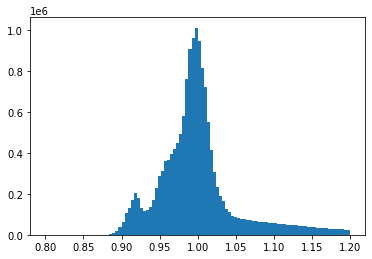

In [41]:
plt.hist(data0ratio.ravel(),bins=100,range=(0.8,1.2))

/tmp/ipykernel_7193/2996555346.py:3: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.imshow(data0ratio,cmap="gray",vmin=0.8,vmax=1.2,norm=LogNorm())


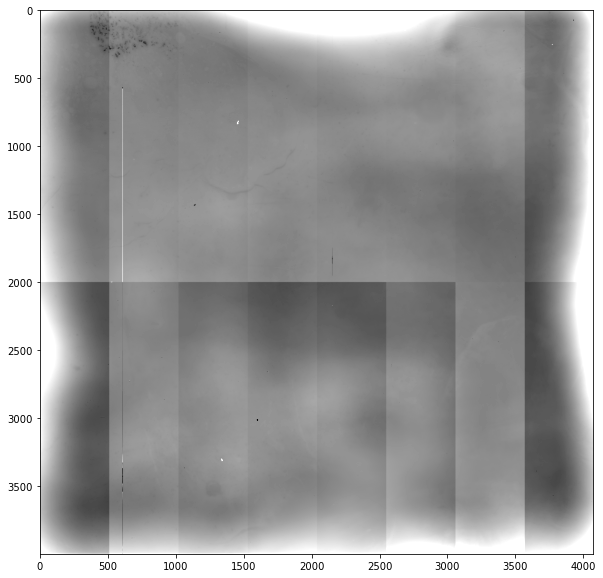

In [42]:
fig = plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
ax.imshow(data0ratio,cmap="gray",vmin=0.8,vmax=1.2,norm=LogNorm())

In [11]:
'''
#Testing part 
#seg must be a number between 1 and 17
seg = 1
fig = plt.figure(figsize=(10,10))
ax=fig.add_subplot(131)
ax.imshow(fred[seg].data,origin='lower',cmap="jet")#,norm=LogNorm())
ax=fig.add_subplot(132)
ax.imshow(fblue[seg].data,origin='lower',cmap="gray")#,norm=LogNorm())
#ax=fig.add_subplot(143)
#ax.imshow(fratio[seg].data,origin='lower',cmap="gray")#,norm=LogNorm())
ax=fig.add_subplot(133)
ax.imshow(fred[seg].data/fblue[seg].data,origin='lower',cmap="gray")#,norm=LogNorm())
'''

'\n#Testing part \n#seg must be a number between 1 and 17\nseg = 1\nfig = plt.figure(figsize=(10,10))\nax=fig.add_subplot(131)\nax.imshow(fred[seg].data,origin=\'lower\',cmap="jet")#,norm=LogNorm())\nax=fig.add_subplot(132)\nax.imshow(fblue[seg].data,origin=\'lower\',cmap="gray")#,norm=LogNorm())\n#ax=fig.add_subplot(143)\n#ax.imshow(fratio[seg].data,origin=\'lower\',cmap="gray")#,norm=LogNorm())\nax=fig.add_subplot(133)\nax.imshow(fred[seg].data/fblue[seg].data,origin=\'lower\',cmap="gray")#,norm=LogNorm())\n'

/tmp/ipykernel_7193/4053388582.py:4: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.imshow(data0red,cmap="gray",vmin=0.985,vmax=1.015,norm=LogNorm())
/tmp/ipykernel_7193/4053388582.py:6: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.imshow(data0blue,cmap="gray",vmin=0.985,vmax=1.015,norm=LogNorm())
/tmp/ipykernel_7193/4053388582.py:10: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.imshow(data0ratio,cmap="gray",vmin=0.985,vmax=1.015,norm=LogNorm())


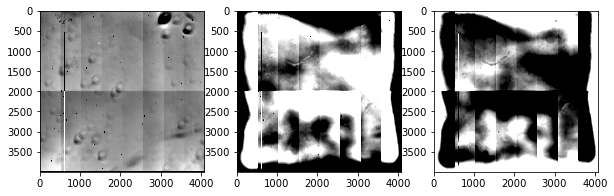

In [43]:
#seg = 1
fig = plt.figure(figsize=(10,10))
ax=fig.add_subplot(131)
ax.imshow(data0red,cmap="gray",vmin=0.985,vmax=1.015,norm=LogNorm())
ax=fig.add_subplot(132)
ax.imshow(data0blue,cmap="gray",vmin=0.985,vmax=1.015,norm=LogNorm())
#ax=fig.add_subplot(143)
#ax.imshow(fratio[seg].data,origin='lower',cmap="gray")#,norm=LogNorm())
ax=fig.add_subplot(133)
ax.imshow(data0ratio,cmap="gray",vmin=0.985,vmax=1.015,norm=LogNorm())

In [44]:
#fred[seg].header['EXTNAME']

In [45]:
print(np.mean(data0red),np.median(data0red),np.std(data0red))
print(np.mean(data0blue),np.median(data0blue),np.std(data0blue))
print(np.mean(data0ratio),np.median(data0ratio),np.std(data0ratio))

1.0005774111815677 1.001353659044525 0.020485175119097948
0.9957963466968561 1.0053616633291185 0.07066873858239822
1.0101337757677031 0.9960403298613083 0.2899732516727124


(array([2.90000e+02, 3.80000e+02, 4.70000e+02, 4.90000e+02, 5.72000e+02,
        6.19000e+02, 6.09000e+02, 7.11000e+02, 1.29100e+03, 4.61300e+03,
        1.29730e+04, 2.46680e+04, 5.23670e+04, 8.27870e+04, 1.21238e+05,
        1.44931e+05, 1.91877e+05, 1.98018e+05, 1.56066e+05, 1.16708e+05,
        1.18773e+05, 1.27644e+05, 1.52654e+05, 1.94135e+05, 2.66607e+05,
        2.94699e+05, 3.40551e+05, 3.62834e+05, 3.81167e+05, 4.07041e+05,
        4.35813e+05, 4.64925e+05, 5.34244e+05, 6.55913e+05, 8.58668e+05,
        9.31032e+05, 9.98734e+05, 9.99950e+05, 8.73143e+05, 7.72209e+05,
        6.48169e+05, 4.69527e+05, 3.64059e+05, 2.63897e+05, 2.06238e+05,
        1.79143e+05, 1.43312e+05, 1.15686e+05, 1.01892e+05, 8.89350e+04,
        8.16920e+04, 7.97740e+04, 7.70160e+04, 7.53370e+04, 7.26630e+04,
        6.98230e+04, 6.73050e+04, 6.50530e+04, 6.37040e+04, 6.11570e+04,
        5.99440e+04, 5.88670e+04, 5.75000e+04, 5.59410e+04, 5.41140e+04,
        5.30390e+04, 5.08040e+04, 4.91940e+04, 4.79

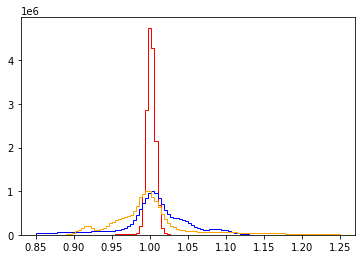

In [46]:
plt.hist(data0red.ravel(),bins=100,range=(0.85,1.25),histtype='step',color='r')
plt.hist(data0blue.ravel(),bins=100,range=(0.85,1.25),histtype='step',color='b')
plt.hist(data0ratio.ravel(),bins=100,range=(0.85,1.25),histtype='step',color='orange')

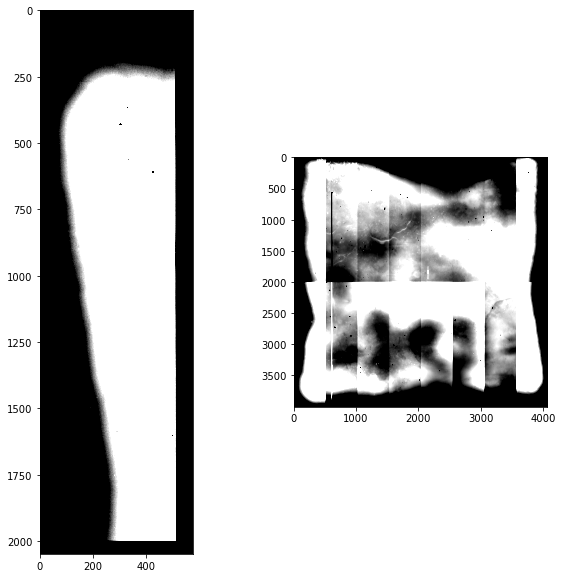

In [47]:
#seg = 1
fig = plt.figure(figsize=(10,10))
ax=fig.add_subplot(121)
ax.imshow(fblue[seg].data,cmap="gray",vmin=0.985,vmax=1.015)#,norm=LogNorm())
ax=fig.add_subplot(122)
ax.imshow(data0blue,cmap="gray",vmin=0.985,vmax=1.015)#,norm=LogNorm())

/tmp/ipykernel_7193/711487022.py:4: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.imshow(fred[seg].data,cmap="gray",vmin=0.985,vmax=1.015,norm=LogNorm())
/tmp/ipykernel_7193/711487022.py:6: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.imshow(data0red,cmap="gray",vmin=0.985,vmax=1.015,norm=LogNorm())


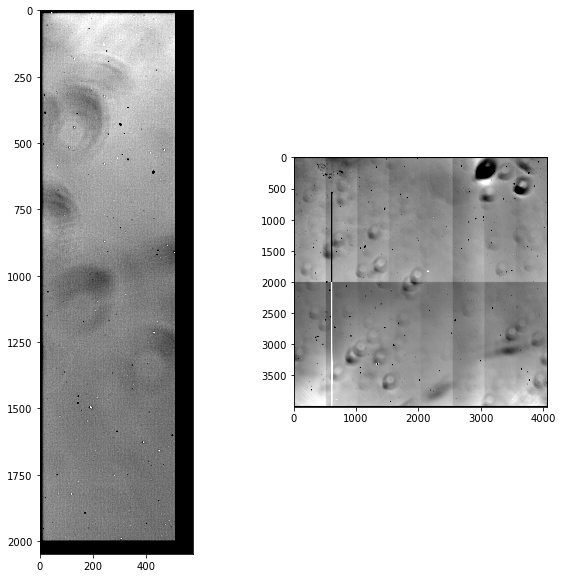

In [48]:
# If not specified, by default, the data is plotted with the origin on top of the image 
fig = plt.figure(figsize=(10,10))
ax=fig.add_subplot(121)
ax.imshow(fred[seg].data,cmap="gray",vmin=0.985,vmax=1.015,norm=LogNorm())
ax=fig.add_subplot(122)
ax.imshow(data0red,cmap="gray",vmin=0.985,vmax=1.015,norm=LogNorm())

In [49]:
# This check does not actually make sense with the median flats (it does with the original flats) 
'''
# Check orientation on the data array itself: print values (above the 3 prescan pixels) from a row in the middle 
# and from a row at the end of the 2D array 
print(fred[seg].data[200,:10])
print(fred[seg].data[2010,:10])
print('---------------')
print(fblue[seg].data[200,:10])
print(fblue[seg].data[2010,:10])
'''

"\n# Check orientation on the data array itself: print values (above the 3 prescan pixels) from a row in the middle \n# and from a row at the end of the 2D array \nprint(fred[seg].data[200,:10])\nprint(fred[seg].data[2010,:10])\nprint('---------------')\nprint(fblue[seg].data[200,:10])\nprint(fblue[seg].data[2010,:10])\n"

In [50]:
'''
# We find that the rows above 2000 correspond entirely to overscan, while the one in the middle has data + overscan 
fig = plt.figure(figsize=(10,10))
ax=fig.add_subplot(121)
ax.hist(fblue[seg].data[200,:])
ax=fig.add_subplot(122)
ax.hist(fblue[seg].data[2010,:])
# Then, the organisation of the data corresponds to the origin = "upper" (by default) orientation 
# This must be taken into account when removing the overscan regions 
'''

'\n# We find that the rows above 2000 correspond entirely to overscan, while the one in the middle has data + overscan \nfig = plt.figure(figsize=(10,10))\nax=fig.add_subplot(121)\nax.hist(fblue[seg].data[200,:])\nax=fig.add_subplot(122)\nax.hist(fblue[seg].data[2010,:])\n# Then, the organisation of the data corresponds to the origin = "upper" (by default) orientation \n# This must be taken into account when removing the overscan regions \n'

# Median smoothing 

In [51]:
'''
seg = 1
x0 = 3
x1 = 180
y0 = 50
y1 = 400
test = fred[seg].data[y0:y1,x0:x1]
testb = fblue[seg].data[y0:y1,x0:x1]
'''

'\nseg = 1\nx0 = 3\nx1 = 180\ny0 = 50\ny1 = 400\ntest = fred[seg].data[y0:y1,x0:x1]\ntestb = fblue[seg].data[y0:y1,x0:x1]\n'

In [52]:
'''
seg = 1
x0 = 3
x1 = 509
y0 = 0
y1 = 2000
test = fred[seg].data[y0:y1,x0:x1]
testb = fblue[seg].data[y0:y1,x0:x1]
'''

'\nseg = 1\nx0 = 3\nx1 = 509\ny0 = 0\ny1 = 2000\ntest = fred[seg].data[y0:y1,x0:x1]\ntestb = fblue[seg].data[y0:y1,x0:x1]\n'

In [53]:
'''
fig = plt.figure(figsize=(15,15))
ax=fig.add_subplot(121)
ax.imshow(fred[seg].data,origin='lower',cmap="jet")#,norm=LogNorm())
ax=fig.add_subplot(122)
ax.imshow(fred[seg].data[y0:y1,x0:x1],origin='lower',cmap="jet")#,norm=LogNorm())
'''

'\nfig = plt.figure(figsize=(15,15))\nax=fig.add_subplot(121)\nax.imshow(fred[seg].data,origin=\'lower\',cmap="jet")#,norm=LogNorm())\nax=fig.add_subplot(122)\nax.imshow(fred[seg].data[y0:y1,x0:x1],origin=\'lower\',cmap="jet")#,norm=LogNorm())\n'

In [54]:
test = data0red

In [55]:
smooth0 = ndimage.median_filter(test, size=2)
smooth1 = ndimage.median_filter(test, size=5)
smooth2 = ndimage.median_filter(test, size=10)
smooth3 = ndimage.median_filter(test, size=20)
smooth4 = ndimage.median_filter(test, size=40)
#smooth5 = ndimage.median_filter(test, size=355)

In [56]:
#img = ndimage.gaussian_filter(dblue_c, sigma=(5, 5, 0), order=0)
#smooth_blue = ndimage.gaussian_filter(dblue_c, sigma=5)

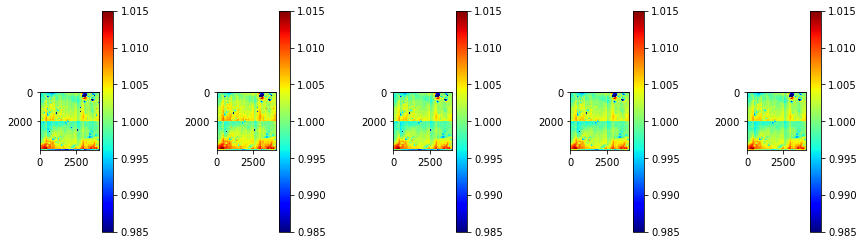

In [57]:
fig = plt.figure(figsize=(14,14))
ax=fig.add_subplot(191)
im=ax.imshow(test,cmap="jet",vmin=0.985,vmax=1.015)#,norm=LogNorm())
fig.colorbar(im, ax=ax)
ax=fig.add_subplot(193)
im=ax.imshow(smooth0,cmap="jet",vmin=0.985,vmax=1.015)#,norm=LogNorm())
fig.colorbar(im, ax=ax)
ax=fig.add_subplot(195)
im=ax.imshow(smooth1,cmap="jet",vmin=0.985,vmax=1.015)#,norm=LogNorm())
fig.colorbar(im, ax=ax)
ax=fig.add_subplot(197)
im=ax.imshow(smooth2,cmap="jet",vmin=0.985,vmax=1.015)#,norm=LogNorm())
fig.colorbar(im, ax=ax)
ax=fig.add_subplot(199)
im=ax.imshow(smooth3,cmap="jet",vmin=0.985,vmax=1.015)#,norm=LogNorm())
fig.colorbar(im, ax=ax)
#ax=fig.add_subplot(196)
#im=ax.imshow(smooth4,cmap="jet")#,norm=LogNorm())
#ax=fig.add_subplot(177)
#im=ax.imshow(smooth5,cmap="jet")#,norm=LogNorm())
#fig.colorbar(im, ax=ax)

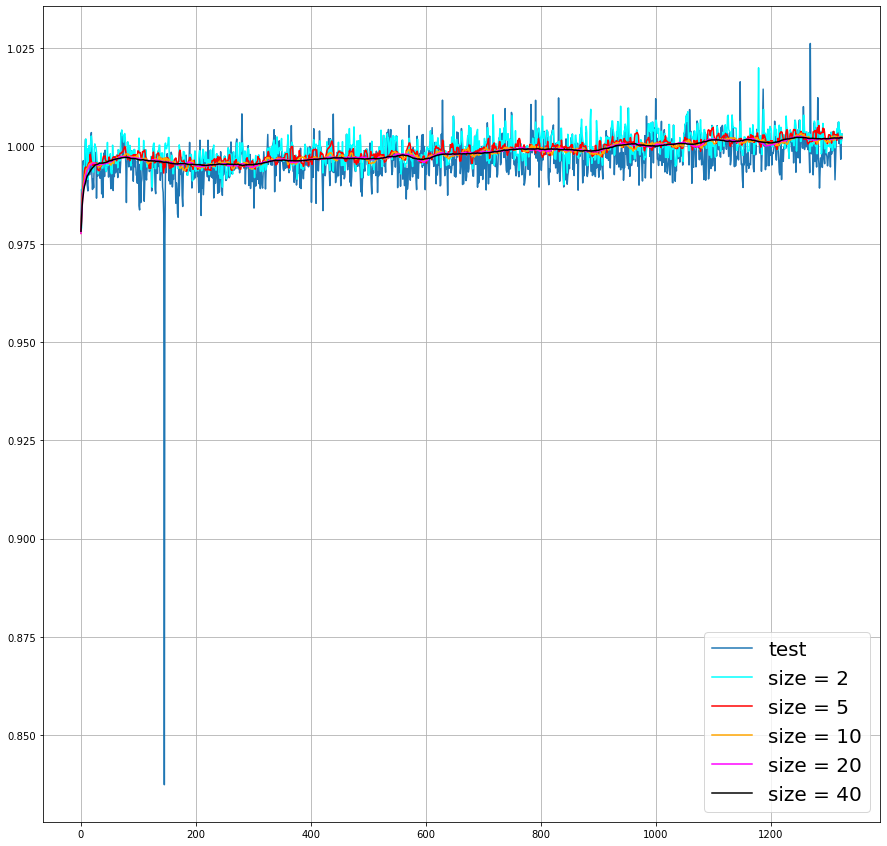

In [58]:
column = 36
y0 = 10
y1 = 1335
fig = plt.figure(figsize=(15,15))
plt.plot(test[y0:y1,column],label='test')
plt.plot(smooth0[y0:y1,column],label='size = 2',color='cyan')
plt.plot(smooth1[y0:y1,column],label='size = 5',color='r')
plt.plot(smooth2[y0:y1,column],label='size = 10',color='orange')
plt.plot(smooth3[y0:y1,column],label='size = 20',color='magenta')
plt.plot(smooth4[y0:y1,column],label='size = 40',color='k')
#plt.plot(smooth5[y0:y1,column],label=r'$\sigma = 355$',color='pink')
plt.grid()
plt.legend(fontsize=20)

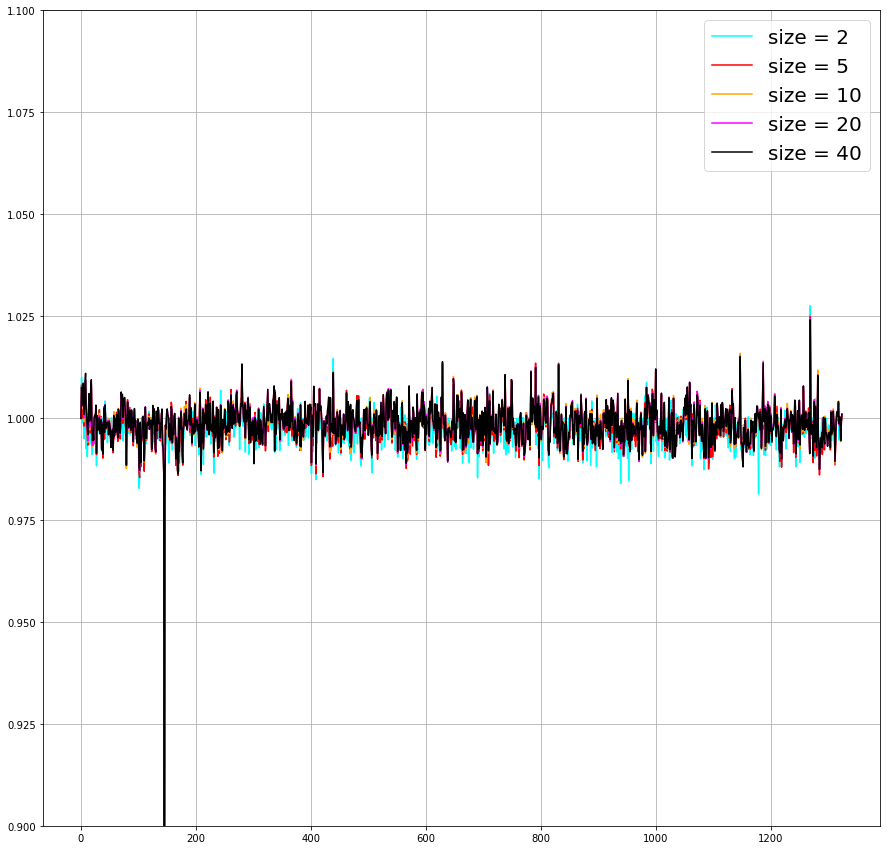

In [59]:
#column = 36
#y0 = 10
fig = plt.figure(figsize=(15,15))
plt.plot(test[y0:y1,column]/smooth0[y0:y1,column],label='size = 2',color='cyan')
plt.plot(test[y0:y1,column]/smooth1[y0:y1,column],label='size = 5',color='r')
plt.plot(test[y0:y1,column]/smooth2[y0:y1,column],label='size = 10',color='orange')
plt.plot(test[y0:y1,column]/smooth3[y0:y1,column],label='size = 20',color='magenta')
plt.plot(test[y0:y1,column]/smooth4[y0:y1,column],label='size = 40',color='k')
#plt.plot(test[y0:y1,column]/smooth5[y0:y1,column],label='size = 355$',color='pink')
plt.grid()
plt.ylim(0.9,1.1)
plt.legend(fontsize=20)

In [60]:
print(np.mean(test[:,column]/smooth0[:,column]).round(4),np.std(test[:,column]/smooth0[:,column]).round(4))
print(np.mean(test[:,column]/smooth1[:,column]).round(4),np.std(test[:,column]/smooth1[:,column]).round(4))
print(np.mean(test[:,column]/smooth2[:,column]).round(4),np.std(test[:,column]/smooth2[:,column]).round(4))
print(np.mean(test[:,column]/smooth3[:,column]).round(4),np.std(test[:,column]/smooth3[:,column]).round(4))
print(np.mean(test[:,column]/smooth4[:,column]).round(4),np.std(test[:,column]/smooth4[:,column]).round(4))
#print(np.mean(test[:,column]/smooth5[:,column]).round(4),np.std(test[:,column]/smooth5[:,column]).round(4))

0.9971 0.0063
0.9978 0.0072
0.9982 0.0089
0.9981 0.0115
0.9979 0.0133


# Iterate over some size values for the smoothing and compare STD 

In [61]:
test.shape

(4000, 4072)

In [62]:
#sigmas = [2,5,10,20,40,80,160,320,640,1280,2560]
sizes = [2,5,10,20,40,80]#,160,320,355,509,640]

In [63]:
std_raw = np.std(test)
print(std_raw)

0.020485175119097948


In [64]:
smooth_dict = {}
smooth_std = []
for size in sizes:
    smooth_ = ndimage.median_filter(test, size=size)
    data_smooth = test/smooth_
    smooth_dict[size] = smooth_
    smooth_std.append(np.std(data_smooth))
smooth_std = np.array(smooth_std)

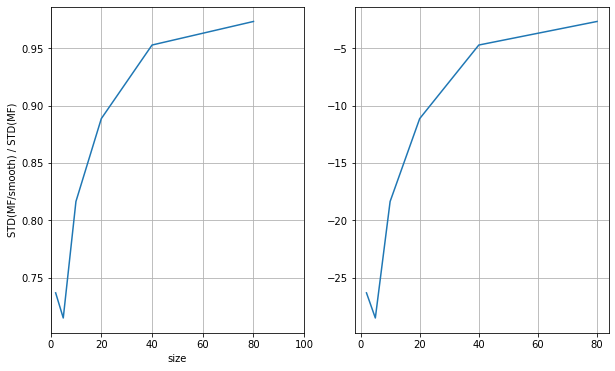

In [65]:
x = np.array(sizes)
fig = plt.figure(figsize=(10,6))
ax=fig.add_subplot(121)
ax.plot(x,smooth_std/std_raw)
plt.xlim(0.,100.)
plt.xlabel('size')
plt.ylabel('STD(MF/smooth) / STD(MF)')
plt.grid()
ax=fig.add_subplot(122)
ax.plot(x,(smooth_std-std_raw)*100./std_raw)
plt.grid()

In [66]:
smooth_dict.keys()

dict_keys([2, 5, 10, 20, 40, 80])

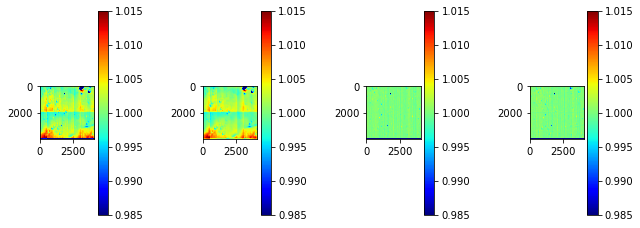

In [67]:
size_median_ = 40
fig = plt.figure(figsize=(10,10))
ax=fig.add_subplot(171)
im1 = ax.imshow(test,cmap="jet",vmin=0.985,vmax=1.015)#,norm=LogNorm())
fig.colorbar(im1, ax=ax)
ax=fig.add_subplot(173)
im2=ax.imshow(smooth_dict[size_median_],cmap="jet",vmin=0.985,vmax=1.015)#,norm=LogNorm())
fig.colorbar(im2, ax=ax)
ax=fig.add_subplot(175)
im3=ax.imshow(test/smooth_dict[size_median_],cmap="jet",vmin=0.985,vmax=1.015)#,norm=LogNorm())
fig.colorbar(im3, ax=ax)
ax=fig.add_subplot(177)
im4=ax.imshow(test/smooth_dict[80],cmap="jet",vmin=0.985,vmax=1.015)#,norm=LogNorm())
fig.colorbar(im4, ax=ax)

# Fix size and repeat for the blue filter 

In [68]:
size_median = 40

In [69]:
testr = test
smoothr = smooth_dict[size_median]

In [70]:
testb = data0blue

In [71]:
#smooth4b = ndimage.gaussian_filter(testb, sigma=40)

In [72]:
smoothb = ndimage.median_filter(testb, size=size_median)

In [50]:
ratio_smooth = (testr.ravel()/smoothr.ravel())/(testb.ravel()/smoothb.ravel())

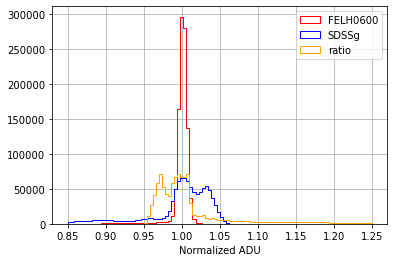

In [55]:
plt.hist(testr.ravel(),bins=100,range=(0.85,1.25),histtype='step',color='r',label='FELH0600')
plt.hist(testb.ravel(),bins=100,range=(0.85,1.25),histtype='step',color='b',label='SDSSg')
plt.hist(data0ratio.ravel(),bins=100,range=(0.85,1.25),histtype='step',color='orange',label='ratio')
plt.xlabel('Normalized ADU')
plt.grid()
plt.legend()

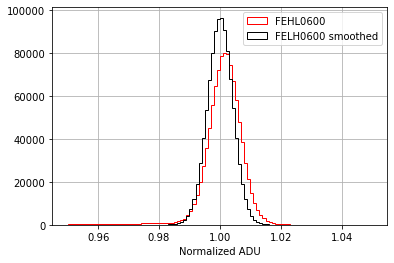

In [56]:
plt.hist(testr.ravel(),bins=100,range=(0.95,1.05),histtype='step',color='r',label='FEHL0600')
plt.hist(testr.ravel()/smoothr.ravel(),bins=100,range=(0.95,1.05),histtype='step',color='k',label='FELH0600 smoothed')
plt.xlabel('Normalized ADU')
plt.grid()
plt.legend()

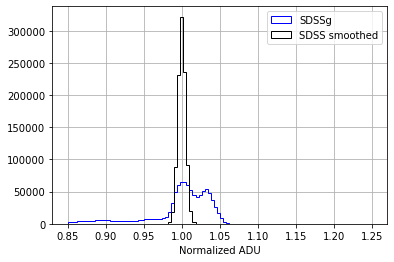

In [57]:
plt.hist(testb.ravel(),bins=100,range=(0.85,1.25),histtype='step',color='b',label='SDSSg')
plt.hist(testb.ravel()/smoothb.ravel(),bins=100,range=(0.85,1.25),histtype='step',color='k',label='SDSS smoothed')
plt.xlabel('Normalized ADU')
plt.grid()
plt.legend()

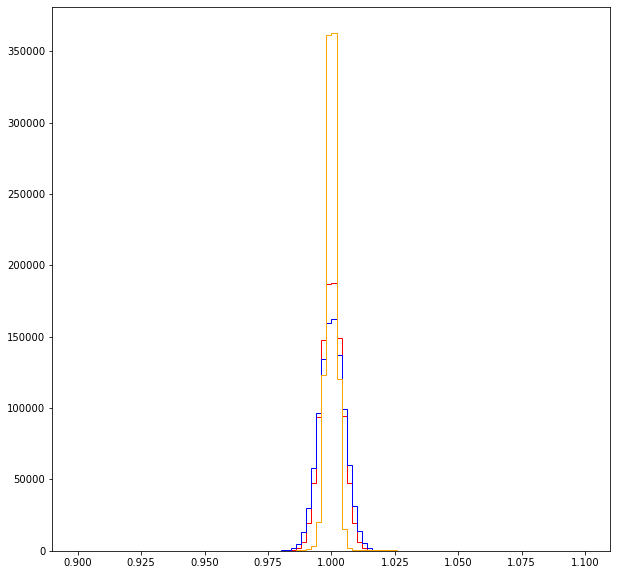

In [58]:
fig = plt.figure(figsize=(10,10))
nr,binsr,_=plt.hist(testr.ravel()/smoothr.ravel(),bins=100,color='r',histtype='step',range=(0.9,1.1))
nb,binsb,_=plt.hist(testb.ravel()/smoothb.ravel(),bins=100,color='b',histtype='step',range=(0.9,1.1))
nratio,binsratio,_=plt.hist(ratio_smooth,bins=100,color='orange',histtype='step',range=(0.9,1.1))

In [59]:
print(np.sum(nr),np.sum(nb))

1015670.0 1015311.0


In [60]:
print(len(test.ravel()))

1018000


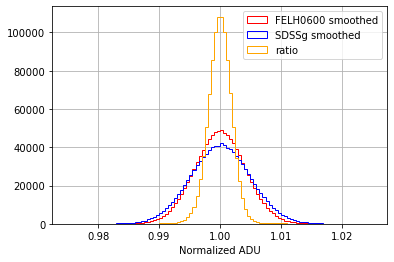

In [61]:
#USE this one 
nr,binsr,_=plt.hist(testr.ravel()/smoothr.ravel(),bins=100,color='r',histtype='step',range=(0.975,1.025),label='FELH0600 smoothed')
nb,binsb,_=plt.hist(testb.ravel()/smoothb.ravel(),bins=100,color='b',histtype='step',range=(0.975,1.025),label='SDSSg smoothed')
nratio,binsratio,_=plt.hist((testr.ravel()/smoothr.ravel())/(testb.ravel()/smoothb.ravel()),bins=100,color='orange',histtype='step',range=(0.975,1.025),label='ratio')
plt.xlabel('Normalized ADU')
plt.grid()
plt.legend()

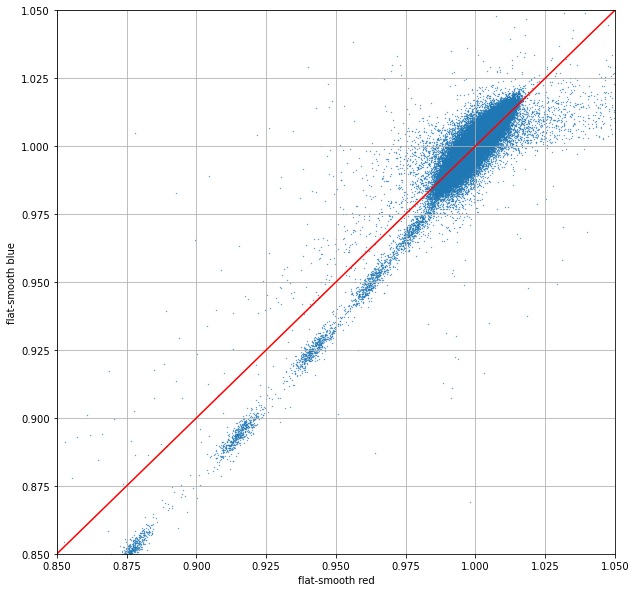

In [62]:
fig = plt.figure(figsize=(10,10))
#ax=fig.add_subplot(111)

#plt.plot(dred_c.ravel(),dblue_c.ravel(),ls='',marker='.')
#plt.scatter(np.log10(test.ravel()-smooth4.ravel()+1.),np.log10(testb.ravel()-smooth4b.ravel()+1.),s=15)
plt.scatter(testr.ravel()/smoothr.ravel(),testb.ravel()/smoothb.ravel(),s=0.1)
plt.xlabel('flat-smooth red')
plt.ylabel('flat-smooth blue')
plt.xlim((0.85,1.05))
plt.ylim((0.85,1.05))
#plt.xscale("log")
#plt.yscale("log")
plt.plot(np.linspace(0.85,1.05,100),np.linspace(0.85,1.05,100),color='r')
plt.grid()

In [63]:
datared = testr.ravel()/smoothr.ravel()
datablue = testb.ravel()/smoothb.ravel()

In [64]:
min_val = 0.97
max_val = 1.03

In [65]:
redmask = (testr.ravel()/smoothr.ravel()>=min_val)*(testr.ravel()/smoothr.ravel()<=max_val)
bluemask = (testb.ravel()/smoothb.ravel()>=min_val)*(testb.ravel()/smoothb.ravel()<=max_val)
jointmask = redmask*bluemask

In [66]:
print(len(testr.ravel()/smoothr.ravel()))
print(len((testr.ravel()/smoothr.ravel())[jointmask]))

1018000
1013059


In [67]:
sr = (testr.ravel()/smoothr.ravel())[jointmask]
sb = (testb.ravel()/smoothb.ravel())[jointmask]

In [68]:
def pearson_coeff(x,y):
    std_x = np.std(x)
    std_y = np.std(y)
    cov_xy = np.cov(x,y)[0,1]
    coeff = cov_xy/(std_x*std_y)
    return coeff

In [73]:
coeff_rb = pearson_coeff(datared,datablue)
coeff_rb_restricted = pearson_coeff(sr,sb)

In [74]:
print(coeff_rb)
print(coeff_rb_restricted)

0.9707560510860476
0.9097810047257279


In [71]:
def density_scatter( x , y, ax = None, sort = True, bins = 20, range=None, **kwargs )   :
        """
        Scatter plot colored by 2d histogram
        """
        if ax is None :
                fig , ax = plt.subplots(figsize=(10,10))
        if range is None:
                data , x_e, y_e = np.histogram2d( x, y, bins = bins)
        else:
                data , x_e, y_e = np.histogram2d( x, y, bins = bins, range=range)
        z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False )

        # Sort the points by density, so that the densest points are plotted last
        if sort :
                idx = z.argsort()
                x, y, z = x[idx], y[idx], z[idx]

        plt.scatter( x, y, c=z, **kwargs )
        cb = plt.colorbar()
        cb.ax.tick_params(labelsize='large')
        return ax

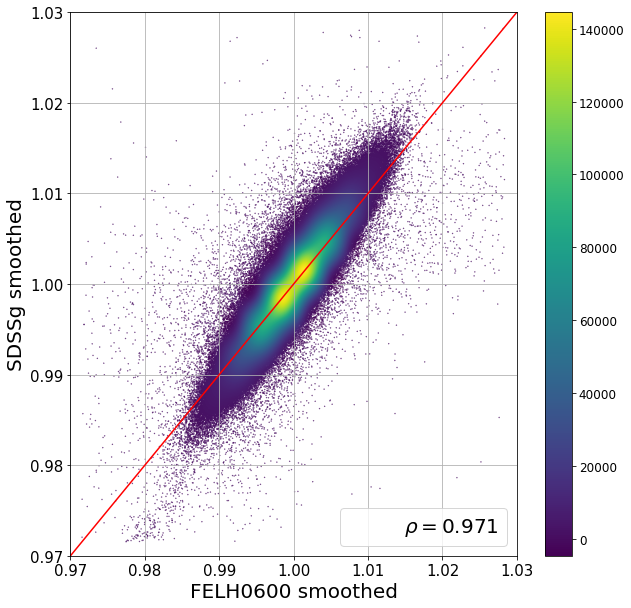

In [72]:
plot = density_scatter(sr,sb,marker='.',s=0.5)
plt.xlim(min_val,max_val)
plt.ylim(min_val,max_val)
plt.plot(np.linspace(min_val,max_val,100),np.linspace(min_val,max_val,100),color='r')
plt.plot([],[],ls='',label=r'$\rho = $'+'{0}'.format(coeff_rb.round(3)))
plt.grid()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('FELH0600 smoothed',fontsize=20)
plt.ylabel('SDSSg smoothed',fontsize=20)
plt.legend(fontsize=20)

In [155]:
smooth_blue_all = ndimage.gaussian_filter(dblue, sigma=5)

NameError: name 'dblue' is not defined

In [ ]:
fig = plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)

ax.imshow(smooth_blue_all,origin='lower',cmap="gray",norm=LogNorm())
plt.show()

In [ ]:
fig = plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)

ax.imshow(dblue_c-smooth_blue+1.,origin='lower',cmap="gray",norm=LogNorm())
plt.show()

In [ ]:
(dblue_c-smooth_blue+1.)[20,20:30]